In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from pathlib import Path
from PIL import Image, ImageEnhance
from PIL.ExifTags import TAGS
from matplotlib import pyplot as plt, image as mpimg
import os
import sys
sys.path
import json
import shutil
from tqdm import tqdm_notebook
# sys.path.insert(0, '/private/tmp/GDAL-2.2.0')
import gdal
from IPython.display import FileLink, FileLinks

First, open the image and get the info

In [4]:
def processImage(inpath, outdir):
    name = inpath.stem;
    tif = gdal.Open(str(inpath));
    info = gdal.Info(tif, allMetadata = True, format = 'json', computeMinMax = True);
    cmin = min([band["computedMin"] for band in info["bands"]]);
    cmax = max([band["computedMax"] for band in info["bands"]]);
    outpath = outdir/f'{name}.jpg';
    out = gdal.Translate(str(outpath),
                            tif,
                            format = 'JPEG',
                            bandList = [4,2,3],
                            scaleParams=[[cmin, cmax, 0, 255]],
                            exponents=[0.5],
                            creationOptions=['PHOTOMETRIC=RGB', 'COMPRESS=NONE', 'JPEG_QUALITY=100']);
    os.remove(f'{outpath}.aux.xml');
    return outpath;

In [5]:
def processDirectory(indir, outdir):
    # clear the directory
    shutil.rmtree(outdir);
    os.mkdir(outdir);
    # process each image in the directory 
    for file in tqdm_notebook(os.listdir(indir)):
        processImage(indir/file, outdir);

In [10]:
indir = Path(f'/home/paperspace/data/planet/train-tif-v2')
outdir = Path(f'/home/paperspace/data/planet/train-jpg-irgb')
#processDirectory(indir, outdir);

In [6]:
indir = Path(f'/home/paperspace/data/planet/test-tif-v2')
outdir = Path(f'/home/paperspace/data/planet/test-jpg-irgb')
processDirectory(indir, outdir);

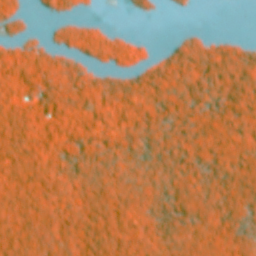

In [27]:
outdir = Path(f'/home/paperspace/data/planet/play')
p = processImage(indir/'train_288.tif', outdir)
Image.open(p)

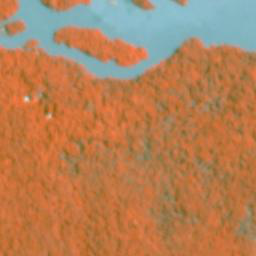

In [29]:
outdir = Path(f'/home/paperspace/data/planet/play')
p = processImage(indir/'train_288.tif', outdir)
Image.open(p)

In [ ]:
tifpath = Path(f'/home/paperspace/data/planet/train-tif-v2/train_123.tif')
outdir = Path(f'/home/paperspace/data/planet/play')
tif = gdal.Open('/home/paperspace/data/planet/train-tif-v2/train_123.tif')
info = gdal.Info(tif, allMetadata = True, format = 'json', computeMinMax = True)


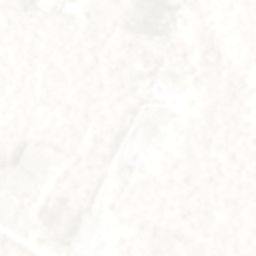

In [6]:
inn = Image.open(tifpath); inn

In [7]:
cmin = min([band["computedMin"] for band in info["bands"]])
cmax = max([band["computedMax"] for band in info["bands"]])

In [8]:
cmin

1219.0

In [9]:
cmax

7767.0

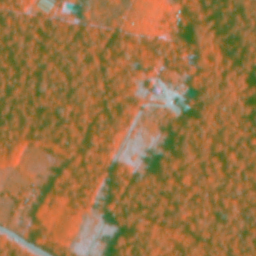

In [11]:
outpath = outdir/'out.png'
out = gdal.Translate(str(outpath),
                            tif,
                            format = 'PNG',
                            bandList = [4,2,3],
                            scaleParams=[[cmin, cmax, 0, 65535]],
                            exponents=[0.5],
                            creationOptions=['PHOTOMETRIC=RGB', 'COMPRESS=DEFLATE']);
pre = Image.open(outpath); pre

In [12]:
pre.getextrema()

((47, 255), (91, 207), (0, 210))

In [39]:
FileLinks(str(outdir))

/home/paperspace/data/planet/train-processed/
  $train_123.png
  $train_123.png.aux.xml